### GA analysis 1
Nb to analytze the GA results

In [11]:
using PyCall
using DataFrames
using Statistics
using Seaborn

rootdir = "/home/stephane/Science/ALMA/ArrayConfig/GASS"
#rootdir = "/home/stephane/alma/ArrayConfig/GASS"

push!(LOAD_PATH,"$rootdir/master/src")
using GASS
using Printf


import Random
import JLD

np= pyimport("numpy")

## directory
datadir = "$rootdir/master/data"
wdir    = "$rootdir/products"
plotdir = "$rootdir/products/test"

cd(wdir)

In [12]:
filename= "random-iter-1.jld"
dat= JLD.load(filename)
niter= length(dat["gass"])
popsize= size(dat["gass"][1].score)[1]

println(dat["gass"][1].score)

[-0.590078, -0.624999, -0.63841, -0.643185, -0.660586, -0.744227, -0.968896, -0.889968, -0.828904, -0.842256, -0.934211, -1.07207, -1.45483, -1.84129, -0.87839, -0.883172, -0.800462, -0.818758, -0.853651, -1.32106, -0.906969, -1.02595, -0.880553, -1.26925, -0.92139, -0.979135, -1.1881, -1.50418, -0.879658, -0.808154, -1.36109, -0.869332, -1.01509, -1.31061, -1.57714, -1.21369, -1.07471, -1.00408, -0.835737, -0.759745, -0.828832, -0.939572, -0.761302, -1.33545, -0.612279, -1.01548, -1.04279, -0.629943, -0.879322, -0.65788, -1.06235, -0.862874, -0.798528, -1.36421, -0.899108, -0.98335, -0.834404, -0.8419, -1.10755, -0.982998, -0.924664, -0.994733, -0.889138, -0.915778, -1.10954, -0.960064, -0.953625, -1.22152, -1.24757, -0.782912, -0.894993, -0.794275, -0.953778, -1.12675, -1.09285, -0.815548, -0.96215, -1.12613, -0.990513, -1.69263, -1.80492, -0.944207, -1.05239, -1.13584, -0.826547, -0.835787, -1.21403, -0.99552, -1.06327, -0.794726, -0.897587, -0.809057, -0.916968, -1.25281, -0.817528

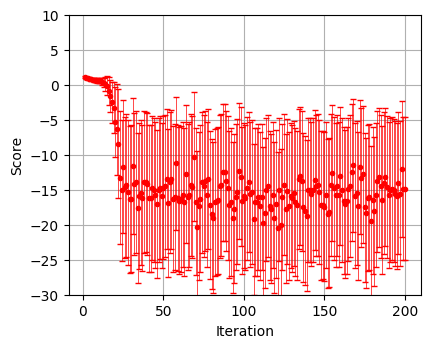

(200, 5)


In [27]:
sc= zeros(niter)
time= zeros(niter)
sc_err= zeros(niter)

println(size(dat["gass"][1].fitness))

for i in 1:niter
    time[i]= i
    sc[i]= mean(dat["gass"][i].fitness[:,2])
    sc_err[i]= std(dat["gass"][i].score)
end


fig = figure(figsize=(10,8))

ax = subplot(221)
grid("on") 
plot(time, sc, ".r", markersize = 1)
errorbar(time, sc  ,yerr=  sc_err ./ 2 , fmt = ".r" , capsize = 2 ,elinewidth=0.5)
ax.set_ylim([-30, 10.0])
xlabel("Iteration")
ylabel("Score")

show()